## Problem Statement:
Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training
examples and 10,000 test examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. The task is to classify these images into an
apparel category amongst 10 categories on which the dataset is benchmarked.

### Load the Fashion MNIST Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Visualize Different Samples from the Dataset

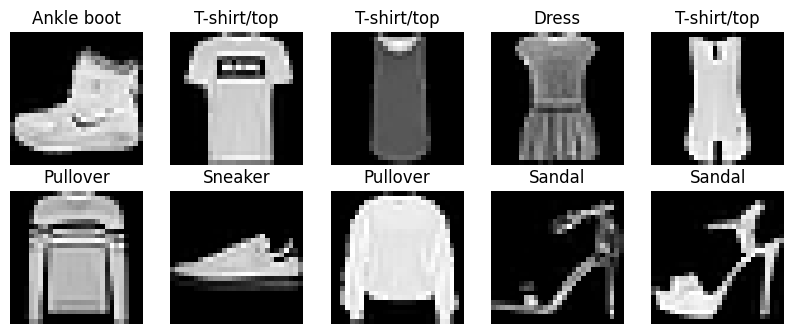

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, classes, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_images(x_train, y_train, class_names)


### Normalize the Pixel Values

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


## Model Building and Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[tensorboard_callback])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7658 - loss: 0.6425 - val_accuracy: 0.8523 - val_loss: 0.4012
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8545 - loss: 0.3922 - val_accuracy: 0.8612 - val_loss: 0.3841
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8745 - loss: 0.3415 - val_accuracy: 0.8732 - val_loss: 0.3467
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8822 - loss: 0.3143 - val_accuracy: 0.8784 - val_loss: 0.3525
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8925 - loss: 0.2944 - val_accuracy: 0.8763 - val_loss: 0.3392
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8963 - loss: 0.2771 - val_accuracy: 0.8755 - val_loss: 0.3474
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8989 - loss: 0.2668 - val_accuracy: 0.8734 - val_loss: 0.3535
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9044 -

### Model Evaluation and Analysis

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8765 - loss: 0.3555
Test accuracy: 0.878600001335144


In [ ]:
# Save the model architecture and weights
model.save('fashion_mnist_model.h5')


###  Model Loading and Verification

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('fashion_mnist_model.h5')

# Verify the architecture
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 575,052 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Ensure that the parameters and weights match
original_params = model.count_params()
loaded_params = loaded_model.count_params()
print(f"Original model parameters: {original_params}")
print(f"Loaded model parameters: {loaded_params}")

assert original_params == loaded_params, "The number of parameters does not match!"


Original model parameters: 575050
Loaded model parameters: 575050
